In [1]:
import scanpy as sc
import muon as mu
import numpy as np
import pandas as pd
import mofax as mofa
import seaborn as sns
import matplotlib.pyplot as plt
import pyro
import torch
import torch.nn.functional as F
import random
import seaborn as sns
import muon as mu
import anndata
import scipy.sparse

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

def to_device(t): return torch.tensor(t).to(device)

%load_ext autoreload
%autoreload 2
import pyromofa


/scratch/venvs/deeplife2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dir="/scratch/deeplife/"
dir="data/"
neurips = anndata.read_h5ad(dir+"neurips2021.h5ad")
neurips.var_names_make_unique()
neurips.layers["counts"] = neurips.X.copy()

/scratch/venvs/deeplife2/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
protein = neurips[:, neurips.var["feature_types"] == "ADT"].copy()
rna = neurips[:, neurips.var["feature_types"] == "GEX"].copy()
rna = rna[:, rna.X.sum(axis=0) > 10].copy()

In [23]:
mofa = pyromofa.MOFA({
    'rna': rna.X,
    'protein': protein.X,
}, K=5, batch_size=1024)
loss, map_estimates, trained_guide = mofa.train(num_iterations=20000)
mofa_matrices = mofa.get_matrices()

Observation masks: {'rna': None, 'protein': None}
[00:00 iteration 00001] loss: 1705062827.9465
[00:05 iteration 00201] loss: 573580652.3865
[00:11 iteration 00401] loss: 1356313928.5513
[00:17 iteration 00601] loss: 740247552.3250
[00:23 iteration 00801] loss: 522044757.4979
[00:29 iteration 01001] loss: 1315559990.8774
[01:34 iteration 01201] loss: 905773498.0397
[01:40 iteration 01401] loss: 696455883.3444
[01:46 iteration 01601] loss: 367282481.5951
[01:52 iteration 01801] loss: 635291796.3435
[01:57 iteration 02001] loss: 540373557.1436
[01:03 iteration 02201] loss: 331528970.8555
[01:08 iteration 02401] loss: 252135427.3395
[01:14 iteration 02601] loss: 646766897.6214
[01:20 iteration 02801] loss: 248329070.3182
[01:25 iteration 03001] loss: 450972953.0068
[02:31 iteration 03201] loss: 209323448.7352
[02:37 iteration 03401] loss: 93715969.8137
[02:43 iteration 03601] loss: 96075466.7411
[02:48 iteration 03801] loss: 217153128.1398
[02:54 iteration 04001] loss: 192121365.6738
[02:

In [24]:
mofa.train(num_iterations=40000)

[00:00 iteration 00001] loss: 367967.7679
[00:05 iteration 00201] loss: 283047.9195
[00:11 iteration 00401] loss: 246041.9870
[00:17 iteration 00601] loss: 363723.4035
[00:23 iteration 00801] loss: 333754.3229
[00:29 iteration 01001] loss: 341887.5509
[01:34 iteration 01201] loss: 192010.9503
[01:40 iteration 01401] loss: 243294.9596
[01:45 iteration 01601] loss: 205534.9520
[01:51 iteration 01801] loss: 159010.1234
[01:57 iteration 02001] loss: 126856.5386
[01:02 iteration 02201] loss: 100685.7319
[01:08 iteration 02401] loss: 151143.6832
[01:14 iteration 02601] loss: 58616.8554
[01:20 iteration 02801] loss: 103647.9330
[01:25 iteration 03001] loss: 90502.2882
[02:31 iteration 03201] loss: 71242.0330
[02:37 iteration 03401] loss: 95336.1144
[02:43 iteration 03601] loss: 104430.9528
[02:49 iteration 03801] loss: 91083.5184
[02:54 iteration 04001] loss: 89949.3042
[02:00 iteration 04201] loss: 6720907.8492
[02:06 iteration 04401] loss: 78102.0427
[02:12 iteration 04601] loss: 56906.2744

([367967.76793787174,
  465243.5737982146,
  428181.6234641661,
  483534.8040752027,
  380049.95969069033,
  614815.1887475776,
  483745.8338858503,
  439357.27537956747,
  554180.6169900307,
  672709.440561092,
  1299046.5437204705,
  668860.0374274798,
  496932.79183213605,
  662854.542412017,
  292782.6442210492,
  268832.42058626236,
  498887.24611831224,
  419785.9634826782,
  135056.56961875368,
  743281.7659307069,
  574793.65270827,
  517749.6106403756,
  317722.7578471175,
  425516.4648890072,
  352043.2154676766,
  260288.56814702964,
  372683.2220089114,
  533965.069482582,
  483572.05123853654,
  380232.479309566,
  562729.2624643452,
  413493.6061698934,
  584301.2489403005,
  286629.88498633733,
  48479591.85401766,
  603849.476713274,
  334276.5256611711,
  184296.74979107926,
  280856.76614391676,
  420799.2666915445,
  270197.36001966696,
  509874.7189225398,
  185250.38574895528,
  486357.08143081545,
  180379.62632676648,
  290044.1418754043,
  311948.15744845284,
  

In [25]:
_ = mofa.train(num_iterations=10_000, lr=2e-4)

/scratch/venvs/deeplife2/lib/python3.12/site-packages/pyro/util.py:365: UserWarning: Found plate statements in guide but not model: {'latent factors'}
  warnings.warn(


[00:00 iteration 00001] loss: 10748.2256
[00:05 iteration 00201] loss: 11795.9755
[00:11 iteration 00401] loss: 11412.4997
[00:16 iteration 00601] loss: 10808.9935
[00:22 iteration 00801] loss: 10811.0590
[01:33 iteration 01001] loss: 11528.3279
[01:39 iteration 01201] loss: 11439.3688
[01:49 iteration 01401] loss: 11387.5390
[01:00 iteration 01601] loss: 10690.5340
[01:11 iteration 01801] loss: 11444.3742
[01:21 iteration 02001] loss: 11004.4188
[02:31 iteration 02201] loss: 11976.0086
[02:43 iteration 02401] loss: 11833.2080
[02:56 iteration 02601] loss: 10734.8707
[02:14 iteration 02801] loss: 11853.7224
[02:27 iteration 03001] loss: 12138.5973
[03:40 iteration 03201] loss: 10740.5621
[03:52 iteration 03401] loss: 11204.7152
[03:06 iteration 03601] loss: 11709.5348
[03:20 iteration 03801] loss: 12101.8581
[04:30 iteration 04001] loss: 11988.5062
[04:37 iteration 04201] loss: 11617.8275
[04:48 iteration 04401] loss: 11673.0852
[04:57 iteration 04601] loss: 11008.3126
[04:06 iteration

In [27]:
mofa.save_h5(neurips.obs.index, { "rna": rna, "protein": protein }, "models/pyro-MOFA-neurips.h5", compression=1)

In [28]:
import mofax
mofax_model = mofax.mofa_model('models/pyro-MOFA-neurips.h5')

(5, 90261) (5, 134)


/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_df = r2_df.append(
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_df = r2_df.append(
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1093: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2 = r2.append(tmp)
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_df = r2_df.append(
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: Futu

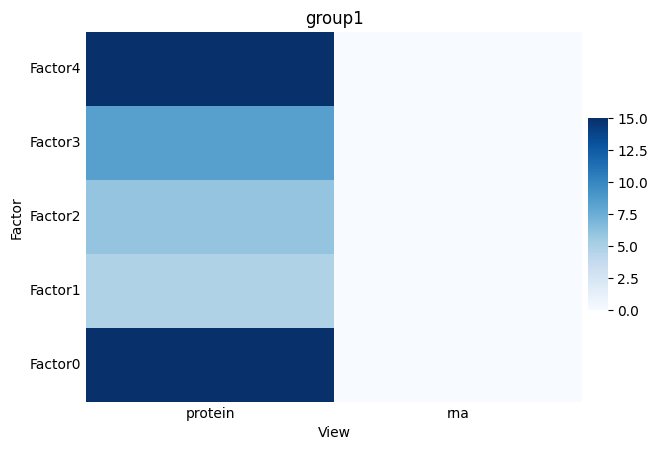

In [29]:
mofax_model
print(mofax_model.factors['group1'].shape, mofax_model.weights['protein'].shape)
mofax.plot_r2(mofax_model, x='View', vmax=15)

In [ ]:
mofax_model.get_r2()

/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_df = r2_df.append(
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_df = r2_df.append(
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1093: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2 = r2.append(tmp)
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_df = r2_df.append(
/scratch/venvs/deeplife2/lib/python3.12/site-packages/mofax/core.py:1003: Futu

,View,Group,R2,Factor
0,protein,group1,1.676828,Factor0
1,rna,group1,11.121571,Factor0
0,protein,group1,1.326144,Factor1
1,rna,group1,10.786819,Factor1
0,protein,group1,0.676972,Factor2
1,rna,group1,9.599674,Factor2
0,protein,group1,1.381230,Factor3
1,rna,group1,10.657531,Factor3
0,protein,group1,1.611120,Factor4
1,rna,group1,10.520983,Factor4


In [ ]:
protein_regen = mofa_matrices.Z @ mofa_matrices.Ws["protein"].T

In [ ]:
protein_regen

tensor([[48.7864, 50.1672, 34.5717,  ...,  3.5688,  3.5712,  4.3290],
        [47.4409, 48.8288, 33.5734,  ...,  3.3584,  3.4070,  4.0482],
        [43.4831, 44.8272, 30.7245,  ...,  2.8329,  2.9679,  3.3625],
        ...,
        [38.8808, 39.9130, 27.7137,  ...,  2.6211,  2.5719,  3.2265],
        [48.1160, 49.6041, 33.9555,  ...,  3.3274,  3.4781,  3.9350],
        [20.4948, 21.0338, 14.5923,  ...,  1.4712,  1.4299,  1.8209]])

In [ ]:
protein.X.toarray()

array([[ 12., 280.,   9., ...,   5.,   2.,   4.],
       [ 24., 231.,  11., ...,   0.,   1.,   1.],
       [ 23., 117.,   3., ...,   1.,   4.,   2.],
       ...,
       [279.,   6., 331., ...,   1.,   2.,   3.],
       [ 11., 133.,  10., ...,   5.,   2.,   5.],
       [441., 658.,   4., ...,   2.,   3.,   2.]], dtype=float32)